In [1]:
import torch
from torchvision import datasets, transforms

import gpytorch

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["image.cmap"] = "Blues_r"

import seaborn as sns

# numbers

In [2]:
rbf_kernel = gpytorch.kernels.RBFKernel()

In [3]:
rbf_kernel(torch.tensor([0.0]), torch.tensor([0.1])).evaluate().item()

0.9896470904350281

In [4]:
rbf_kernel(torch.tensor([0.0]), torch.tensor([10.0])).evaluate().item()

0.0

# images

In [5]:
rbf_kernel = gpytorch.kernels.RBFKernel()
rbf_kernel.lengthscale = 100

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

dataset = datasets.MNIST("../data", train=True, download=True, transform=transform)

train_x = dataset.data.view(-1, 28 * 28)

In [7]:
train_x[0, :]

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
         18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 1

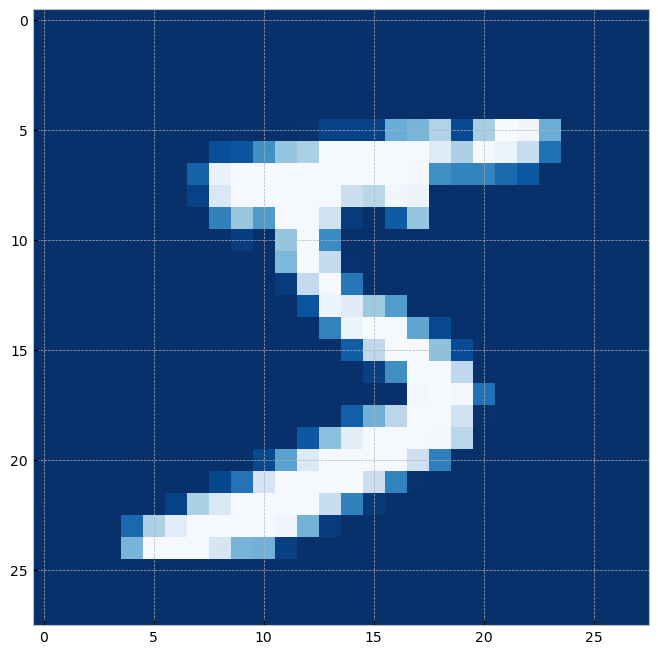

In [8]:
plt.figure(figsize=(8, 8))

plt.imshow(train_x[0, :].view(28, 28));

In [9]:
ind1 = 304
ind2 = 786
ind3 = 4

rbf_kernel(train_x[[ind1, ind2, ind3], :]).evaluate()

tensor([[1.0000e+00, 4.9937e-25, 0.0000e+00],
        [4.9937e-25, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00]], grad_fn=<RBFCovarianceBackward>)

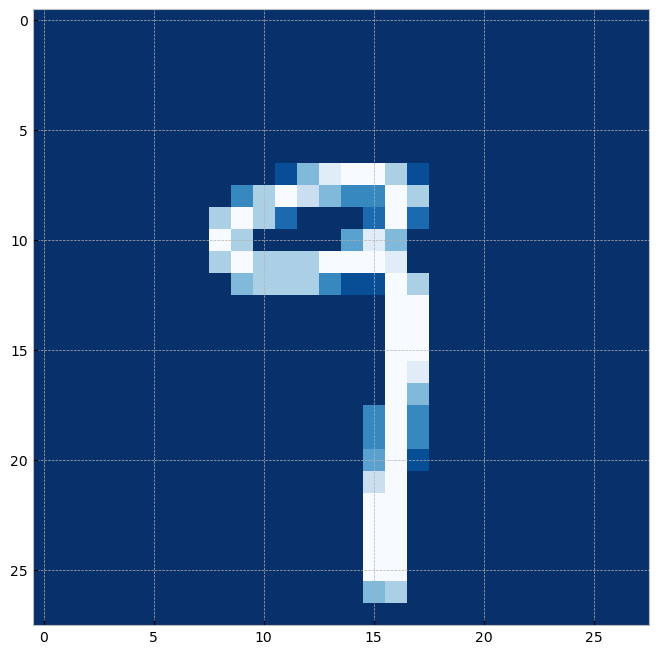

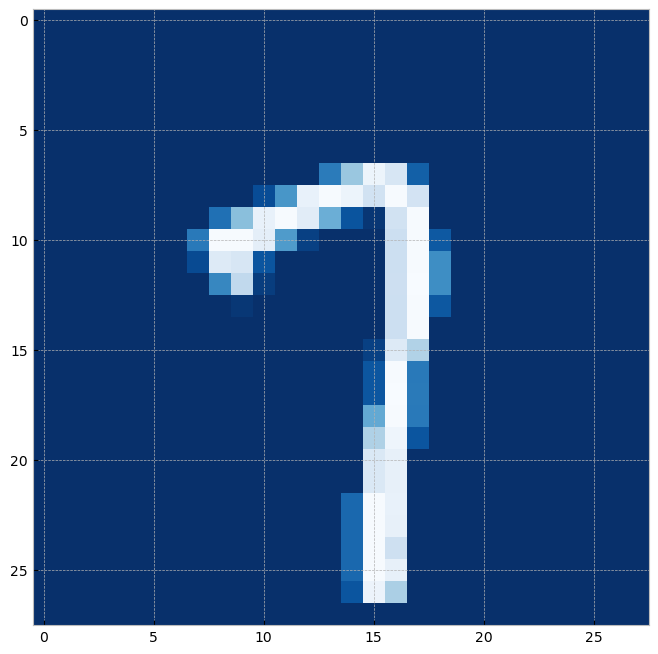

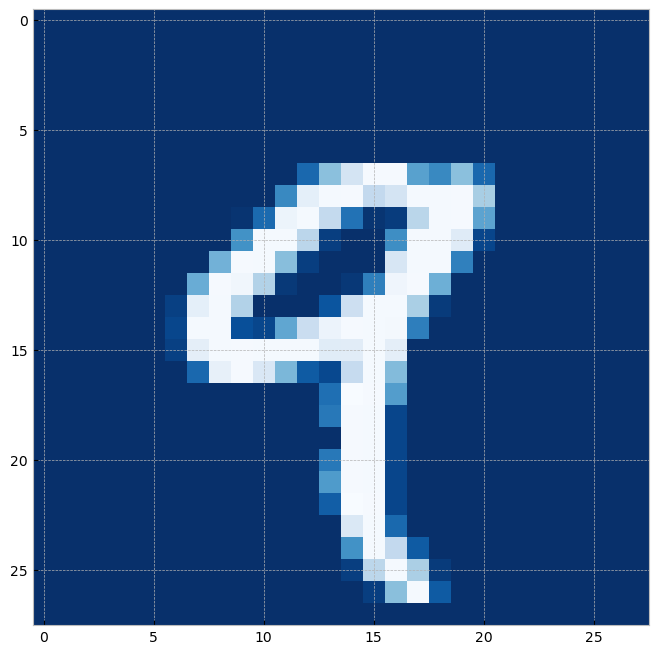

In [10]:
for ind in [ind1, ind2, ind3]:
    plt.figure(figsize=(8, 8))

    plt.imshow(train_x[ind, :].view(28, 28));

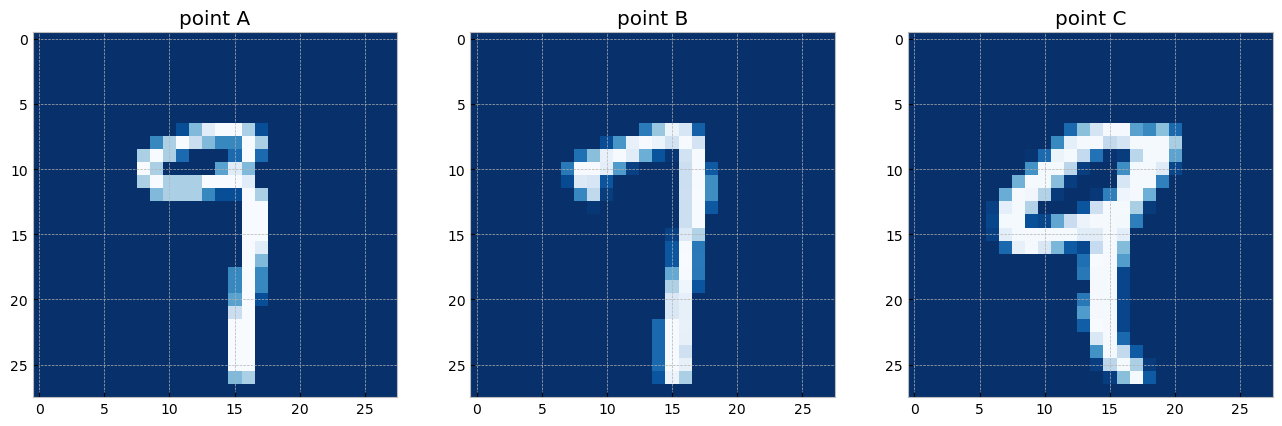

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].imshow(train_x[ind1, :].view(28, 28))
ax[0].set_title("point A")

ax[1].imshow(train_x[ind2, :].view(28, 28))
ax[1].set_title("point B")

ax[2].imshow(train_x[ind3, :].view(28, 28))
ax[2].set_title("point C")

plt.show()